In [81]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

import seaborn as sns

In [82]:
df = pd.DataFrame({
    'x':list(range(-100,100,5))
})
df.head()

,x
0,-100
1,-95
2,-90
3,-85
4,-80


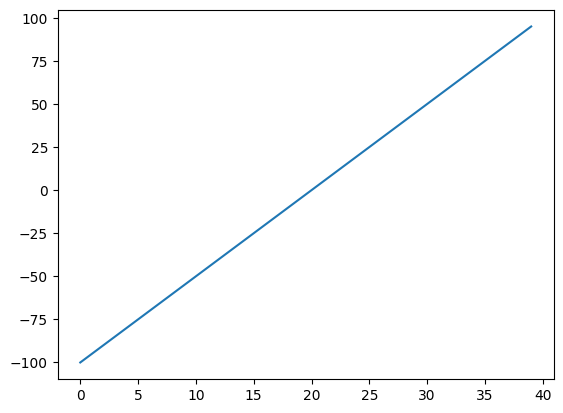

In [83]:
plt.plot(df['x'])

In [84]:
df['x2'] = df['x']**2
df['x3'] = df['x']**3
df['x4'] = df['x']**4
df

,x,x2,x3,x4
0,-100,10000,-1000000,100000000
1,-95,9025,-857375,81450625
2,-90,8100,-729000,65610000
3,-85,7225,-614125,52200625
4,-80,6400,-512000,40960000
5,-75,5625,-421875,31640625
6,-70,4900,-343000,24010000
7,-65,4225,-274625,17850625
8,-60,3600,-216000,12960000
9,-55,3025,-166375,9150625


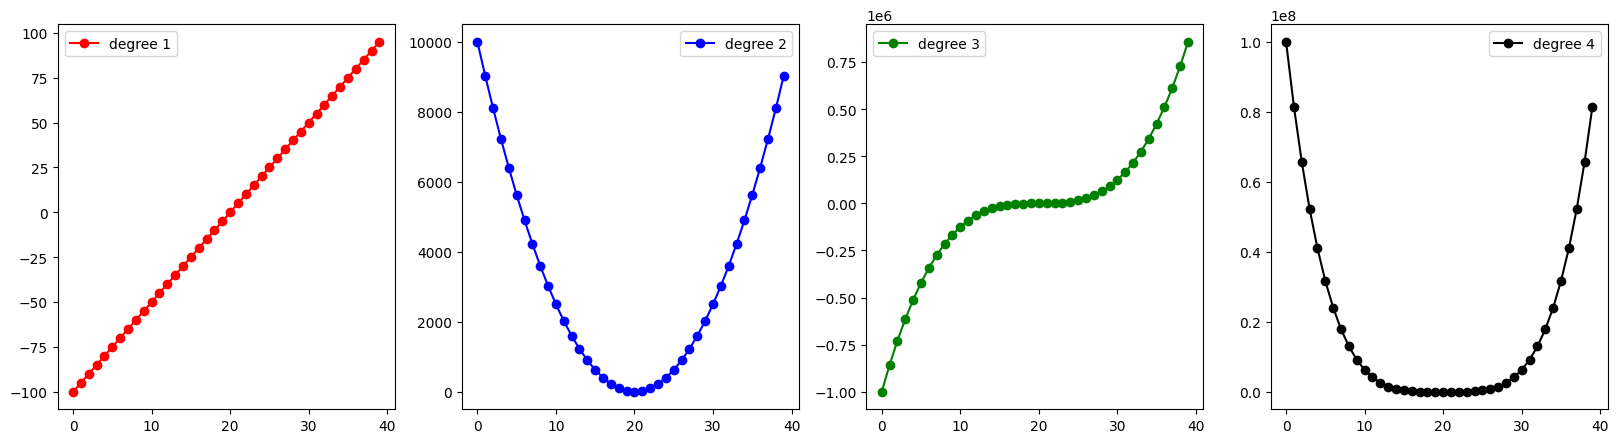

In [85]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
ax1.plot(df['x'], color='red', label='degree 1',marker='o')
ax2.plot(df['x2'], color='blue', label='degree 2',marker='o')
ax3.plot(df['x3'], color='green', label='degree 3',marker='o')
ax4.plot(df['x4'], color='black', label='degree 4',marker='o')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

IMPORT DATA

In [86]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


ANALYZE DATA

In [87]:
df.sample(5)

,Position,Level,Salary
7,Senior Partner,8,300000
5,Region Manager,6,150000
9,CEO,10,1000000
4,Country Manager,5,110000
0,Business Analyst,1,45000


In [88]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [89]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


C:\Users\saumy\AppData\Local\Temp\ipykernel_15468\3029447005.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


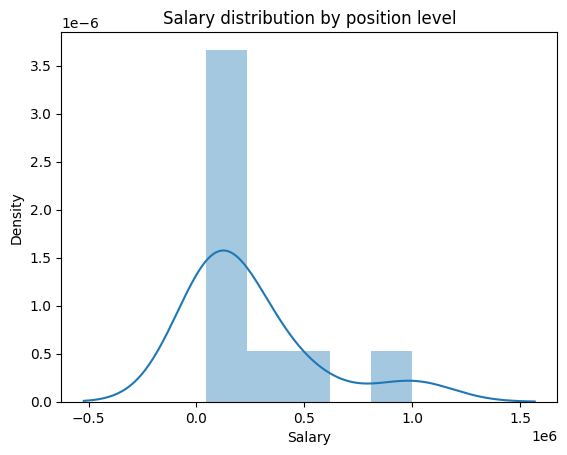

In [90]:
#data distribution

plt.title('Salary distribution by position level')
sns.distplot(df['Salary'])
plt.show()

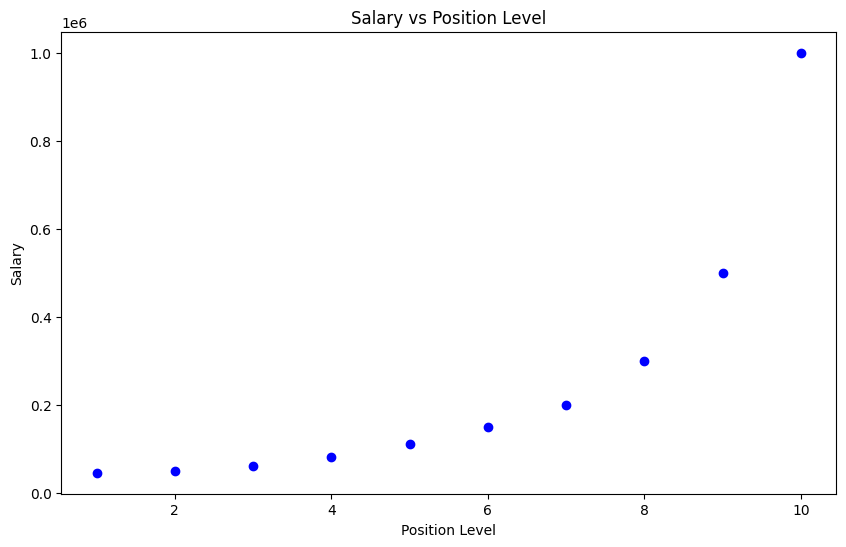

In [91]:
# relationship between level and salary #nonlinear nature k data ko polynomial regression se fit karna padega
plt.figure(figsize=(10,6))
plt.scatter(df['Level'], df['Salary'], color='blue')
plt.title('Salary vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [92]:
# Splitting the dataset into the training set and test set
X = df[['Level']]
y = df['Salary']

In [93]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [94]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [95]:
# train the dataset
lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

In [96]:
# train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree=5)
X_poly = pr.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

PREDICT RESULTS

In [97]:
# predict
y_pred_poly = lr2.predict(X_poly)
print(y_pred_poly)

y_pred_lr = lr.predict(X)
print(y_pred_lr)

[ 43895.10489603  53836.82983702  57065.26806562  77286.71328733
 112263.40326407 152736.59673704 201349.6503497  291571.0955707
 506617.71561678 998377.62237572]
[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


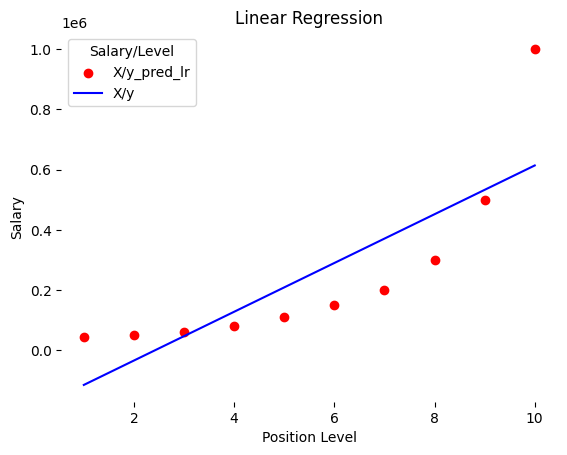

In [98]:
#visualize the linear regression 
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_lr, color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = "Salary/Level",loc='best',facecolor='white')
plt.box(False)
plt.show()

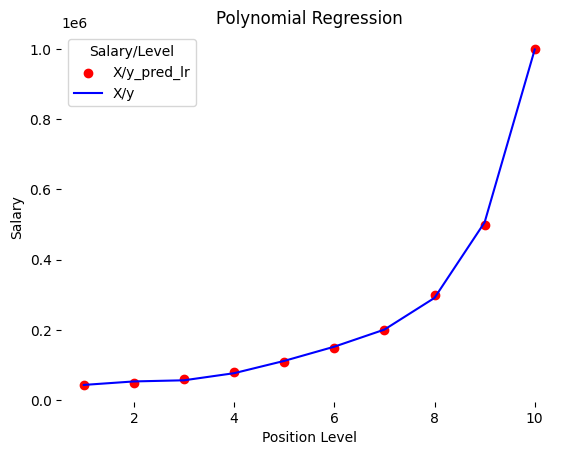

In [99]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_poly, color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = "Salary/Level",loc='best',facecolor='white')
plt.box(False)
plt.show()

In [100]:
print(f'Linear reg result: {lr.predict([[6.5]])}')
print(f'Polynomial reg results: {lr2.predict(pr.fit_transform([[6.5]]))}')

Linear reg result: [330378.78787879]
Polynomial reg results: [174878.07765177]


c:\Users\saumy\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
temperature = np.array([20],[22],[24],[26],[28],[30],[32])
sales =[10,515,25,40,60,90,130]